In [1]:
import cv2
import ultralytics
from ultralytics import YOLO

from YoloKit.Utils import draw_polygons_only, get_filename, resize_and_pad, tile_image, show_image, show_prediction_overlay
ultralytics.checks()

Ultralytics 8.3.252  Python-3.12.10 torch-2.9.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Setup complete  (24 CPUs, 31.2 GB RAM, 3651.7/5589.0 GB disk)


In [ ]:
model_checkpoint = "Models/TinyYolo_2a/weights/best.pt"
model = YOLO(model_checkpoint, task="segment")

test_img_path = "TestImages/58860024.tif"
image_name = get_filename(test_img_path)
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_GRAY2RGB)
img_padded, meta = resize_and_pad(test_img)

tile_data = tile_image(img_padded, overlap=0.2)
img_tiles = [t.img for t in tile_data]

print(f"Tiles: {len(img_tiles)}")

Tiles: 6



0: 512x512 9 lines, 18.4ms
Speed: 1.0ms preprocess, 18.4ms inference, 11.9ms postprocess per image at shape (1, 3, 512, 512)


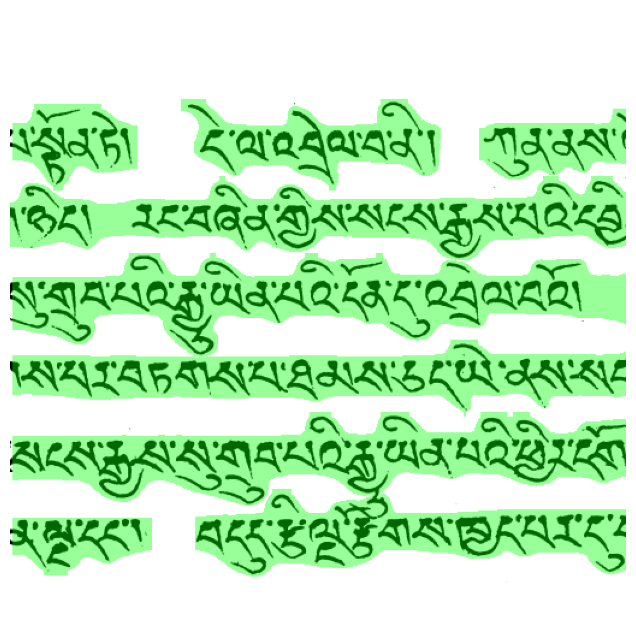

In [3]:
# infer single tile
results = model(img_tiles[3])
show_prediction_overlay(results)

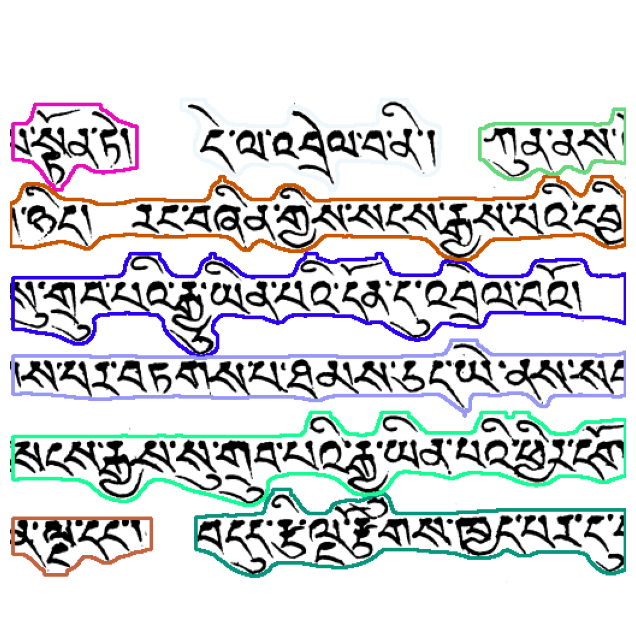

In [4]:
r = results[0]   # one tile
polys = r.masks.xy
poly_overlay = draw_polygons_only(img_tiles[3], polys)
show_image(poly_overlay)